In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
pd.set_option('display.max_columns', None)

s19_regular = pd.read_csv('DATA/CSV_FILES/REGULAR_DATA/S19.csv')
s20_regular = pd.read_csv('DATA/CSV_FILES/REGULAR_DATA/S20.csv')
s21_regular = pd.read_csv('DATA/CSV_FILES/REGULAR_DATA/S21.csv')
s22_regular = pd.read_csv('DATA/CSV_FILES/REGULAR_DATA/S22.csv')
s23_regular = pd.read_csv('DATA/CSV_FILES/REGULAR_DATA/S23.csv')
s24_regular = pd.read_csv('DATA/CSV_FILES/REGULAR_DATA/S24.csv')
s25_regular = pd.read_csv('DATA/CSV_FILES/REGULAR_DATA/S25.csv')
s26_regular = pd.read_csv('DATA/CSV_FILES/REGULAR_DATA/S26.csv')

### Difference between a Normal Distribution and Uniform Distribution

Mean PTS: 10.644339694366304, Std Dev PTS: 8.79820539964503


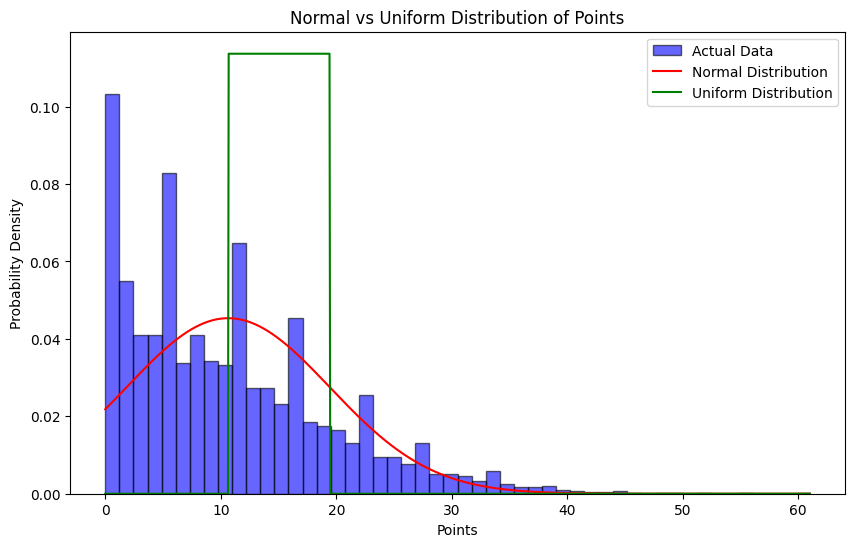

In [58]:
from scipy import stats

mean_pts, std_pts = s25_regular['PTS'].mean(), s25_regular['PTS'].std()
print(f"Mean PTS: {mean_pts}, Std Dev PTS: {std_pts}")

fig, ax = plt.subplots(figsize=(10, 6))

# x = np.linspace(mean_pts - 4*std_pts, mean_pts + 4*std_pts, 1000)
x = np.linspace(0, s25_regular['PTS'].max(), 1000)
normal_dist = stats.norm(loc=mean_pts, scale=std_pts)
uniform_dist = stats.uniform(loc=mean_pts, scale=std_pts)
cdf_normal = normal_dist.cdf(x)
cdf_uniform = uniform_dist.cdf(x)
ax.hist(s25_regular['PTS'], bins=50, density=True, alpha=0.6, 
        color='blue', label='Actual Data', edgecolor='black')
ax.plot(x, normal_dist.pdf(x), color='red', label='Normal Distribution')
ax.plot(x, uniform_dist.pdf(x), color='green', label='Uniform Distribution')
# ax.plot(x, cdf_normal, color='purple', label='Normal Distribution CDF')
# ax.plot(x, cdf_uniform, color='orange', label='Uniform Distribution CDF')
ax.legend()
ax.set_xlabel('Points')
ax.set_ylabel('Probability Density')
ax.set_title('Normal vs Uniform Distribution of Points')
plt.show()

INFERENCE:

NORMAL DISTRIBUTION:
- Shape: Bell-shaped, peak at mean
- Probability: Concentrated near the center

UNIFORM DISTRIBUTION:
- Shape: Flat, rectangular
- Probability: Spread evenly across range

Decision Rule:
"Does my data have a TYPICAL value?"

Yes -> NORMAL

No -> UNIFORM

### PDF VS CDF

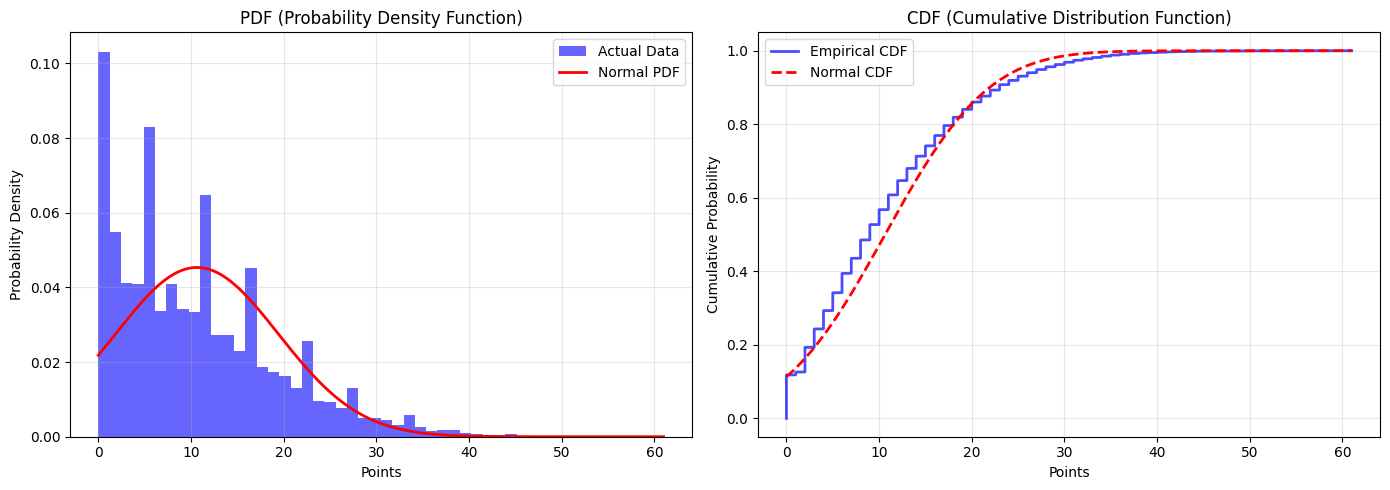

In [7]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

mean_pts = s25_regular['PTS'].mean()
std_pts = s25_regular['PTS'].std()
normal_dist = stats.norm(loc=mean_pts, scale=std_pts)
x = np.linspace(0, s25_regular['PTS'].max(), 1000)

# LEFT: PDF
axes[0].hist(s25_regular['PTS'], bins=50, density=True, alpha=0.6, 
             color='blue', label='Actual Data')
axes[0].plot(x, normal_dist.pdf(x), 'r-', linewidth=2, label='Normal PDF')
axes[0].set_xlabel('Points')
axes[0].set_ylabel('Probability Density')
axes[0].set_title('PDF (Probability Density Function)')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# RIGHT: CDF
sorted_pts = np.sort(s25_regular['PTS'])
empirical_cdf = np.arange(1, len(sorted_pts) + 1) / len(sorted_pts)
axes[1].plot(sorted_pts, empirical_cdf, 'b-', linewidth=2, 
             label='Empirical CDF', alpha=0.7)
axes[1].plot(x, normal_dist.cdf(x), 'r--', linewidth=2, label='Normal CDF')
axes[1].set_xlabel('Points')
axes[1].set_ylabel('Cumulative Probability')
axes[1].set_title('CDF (Cumulative Distribution Function)')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

PDF: 
- What it shows: "How dense/concentrated is the probability at each point? 
- Shape: Bell Curve

CDF:
- What it shows: "What percentage of values are <= x ?"
- Shape: S-curve

Use Empirical if your boss asks: "How did OUR team perform?"
- Empirical = describing your data

Use Fitted if your boss asks: "Should we expect this from future players?"
- Fitted = making predictions beyond your data


**Finding the marginal PMF of \(X\) from a joint PMF \(p_{X,Y}(x,y)\):**

1. Identify the joint PMF \(p_{X,Y}(x,y)\).

2. Sum over all possible values of \(Y\):
   \[
   p_X(x) = \sum_{y} p_{X,Y}(x,y)
   \]
   This gives the probability that \(X\) takes value \(x\), regardless of \(Y\).

3. If \(Y\) is continuous, replace the sum with an integral:
   \[
   p_X(x) = \int p_{X,Y}(x,y)\,dy
   \]

# EXPECTED VALUE, VARIANCE, and COVARIANCE

### Expected Value

In [17]:
print("\n" + "=" * 70)
print("1. EXPECTED VALUE (E[X])")
print("=" * 70)
print("""
CONCEPT: Expected Value is the average outcome you'd expect over many trials.
         It's the weighted average of all possible values.

FORMULA: E[X] = Σ(x_i * p_i) where p_i is the probability of x_i
         OR simply: E[X] = mean of all observations
""")

# Example: Points per game for a player
print("\n--- NBA Example: LeBron James Points Per Game ---")
lbj = s25_regular[s25_regular['PLAYER_ID'] == 2544]
lebron_points_last_10_games = lbj['PTS'].tail(10).mean()

expected_points = np.mean(lebron_points_last_10_games)
print(f"Last 10 games: {lebron_points_last_10_games}")
print(f"Expected Value (Mean): {expected_points:.2f} points per game")
print(f"\nInterpretation: On average, we expect LeBron to score ~{expected_points:.1f} points")


1. EXPECTED VALUE (E[X])

CONCEPT: Expected Value is the average outcome you'd expect over many trials.
         It's the weighted average of all possible values.

FORMULA: E[X] = Σ(x_i * p_i) where p_i is the probability of x_i
         OR simply: E[X] = mean of all observations


--- NBA Example: LeBron James Points Per Game ---
Last 10 games: 21.9
Expected Value (Mean): 21.90 points per game

Interpretation: On average, we expect LeBron to score ~21.9 points


### VARIANCE

In [19]:
print("\n" + "=" * 70)
print("2. VARIANCE (Var(X))")
print("=" * 70)
print("""
CONCEPT: Variance measures how spread out the data is from the mean.
         It tells you how "consistent" or "volatile" a player's performance is.

FORMULA: Var(X) = E[(X - μ)²] = Σ(x_i - μ)² / n
         where μ is the mean

High variance = inconsistent performance
Low variance = consistent performance
""")

print("\n--- NBA Example: Comparing Two Players ---")

# Player A: Consistent scorer
player_a_points = [20, 21, 19, 20, 22, 20, 21, 19, 20, 21]  # Consistent
# Player B: Inconsistent scorer
player_b_points = [10, 30, 15, 35, 8, 28, 12, 32, 18, 25]   # Volatile

def calculate_variance(data: List[float]) -> float:
    """Calculate variance of a dataset"""
    mean = sum(data) / len(data)
    squared_diffs = [(x - mean) ** 2 for x in data]
    variance = sum(squared_diffs) / len(data)
    return variance

var_a = calculate_variance(player_a_points)
var_b = calculate_variance(player_b_points)

print(f"Player A (Consistent): {player_a_points}")
print(f"  Expected Value: {np.mean(player_a_points):.2f} points")
print(f"  Variance: {var_a:.2f}")
print(f"  Standard Deviation: {np.sqrt(var_a):.2f}")

print(f"\nPlayer B (Volatile): {player_b_points}")
print(f"  Expected Value: {np.mean(player_b_points):.2f} points")
print(f"  Variance: {var_b:.2f}")
print(f"  Standard Deviation: {np.sqrt(var_b):.2f}")

print(f"\nInsight: Both players average ~{np.mean(player_a_points):.0f} points,")
print(f"   but Player B is {var_b/var_a:.1f}x more inconsistent!")


2. VARIANCE (Var(X))

CONCEPT: Variance measures how spread out the data is from the mean.
         It tells you how "consistent" or "volatile" a player's performance is.

FORMULA: Var(X) = E[(X - μ)²] = Σ(x_i - μ)² / n
         where μ is the mean

High variance = inconsistent performance
Low variance = consistent performance


--- NBA Example: Comparing Two Players ---
Player A (Consistent): [20, 21, 19, 20, 22, 20, 21, 19, 20, 21]
  Expected Value: 20.30 points
  Variance: 0.81
  Standard Deviation: 0.90

Player B (Volatile): [10, 30, 15, 35, 8, 28, 12, 32, 18, 25]
  Expected Value: 21.30 points
  Variance: 87.81
  Standard Deviation: 9.37

Insight: Both players average ~20 points,
   but Player B is 108.4x more inconsistent!


### COVARIANCE

In [22]:
print("\n" + "=" * 70)
print("3. COVARIANCE (Cov(X, Y))")
print("=" * 70)
print("""
CONCEPT: Covariance measures how two variables change TOGETHER.
         Do they increase together? Decrease together? Or move independently?

FORMULA: Cov(X,Y) = E[(X - μ_X)(Y - μ_Y)] = Σ(x_i - μ_X)(y_i - μ_Y) / n

Positive covariance = when X increases, Y tends to increase
Negative covariance = when X increases, Y tends to decrease
Zero covariance = no linear relationship
""")

print("\n--- NBA Example: Points vs Assists ---")

# Scenario: Point guard's points and assists over 10 games
points = [15, 20, 18, 22, 16, 25, 19, 21, 17, 23]
assists = [8, 11, 9, 12, 8, 13, 10, 11, 9, 12]

def calculate_covariance(x: List[float], y: List[float]) -> float:
    """Calculate covariance between two datasets"""
    if len(x) != len(y):
        raise ValueError("Lists must be same length")
    
    mean_x = sum(x) / len(x)
    mean_y = sum(y) / len(y)
    
    covariance = sum((x[i] - mean_x) * (y[i] - mean_y) for i in range(len(x))) / len(x)
    return covariance

cov_points_assists = calculate_covariance(points, assists)

print(f"Points:  {points}")
print(f"Assists: {assists}")
print(f"\nCovariance: {cov_points_assists:.2f}")
print(f"\nInsight: Positive covariance ({cov_points_assists:.2f}) means when this player")
print(f"   scores more points, they also tend to get more assists!")


3. COVARIANCE (Cov(X, Y))

CONCEPT: Covariance measures how two variables change TOGETHER.
         Do they increase together? Decrease together? Or move independently?

FORMULA: Cov(X,Y) = E[(X - μ_X)(Y - μ_Y)] = Σ(x_i - μ_X)(y_i - μ_Y) / n

Positive covariance = when X increases, Y tends to increase
Negative covariance = when X increases, Y tends to decrease
Zero covariance = no linear relationship


--- NBA Example: Points vs Assists ---
Points:  [15, 20, 18, 22, 16, 25, 19, 21, 17, 23]
Assists: [8, 11, 9, 12, 8, 13, 10, 11, 9, 12]

Covariance: 5.02

Insight: Positive covariance (5.02) means when this player
   scores more points, they also tend to get more assists!


### Key Takeaways:
Expected Value - The average you expect. If Curry averages 28 PPG, that's his expected value.

Variance - Measures consistency. A player who scores 20, 21, 19, 20 has LOW variance (consistent). A player who scores 10, 30, 8, 35 has HIGH variance (volatile).

Covariance - How two stats move together:
- Positive: More points → More assists (they increase together)
- Negative: More points → Fewer turnovers (one increases, other decreases)
- Near Zero: No relationship

## BASIC PROB, JOINT PROB, and CONDITIONAL PROB

In [29]:
print("\n" + "=" * 80)
print("1. BASIC PROBABILITY")
print("=" * 80)
print("""
CONCEPT: Probability measures how likely an event is to occur.

FORMULA: P(Event) = (Number of times event occurs) / (Total number of outcomes)
         Range: 0 ≤ P(Event) ≤ 1
         
         P(Event) = 0   → Event never happens
         P(Event) = 0.5 → Event happens 50% of the time
         P(Event) = 1   → Event always happens
""")

# Example dataset: 20 games from a player
print("\n--- NBA Example: Basic Probability ---")

df = s25_regular[s25_regular['PLAYER_ID'] == 2544]
df = df[['PTS', 'MIN']]
total_games = len(df)

print(f"Total games analyzed: {total_games}")
print("\nFirst 5 games:")
print(df.head())

# Simple probability: P(scores 25+ points)
scored_25_plus = df[df['PTS'] >= 25]
prob_25_plus = len(scored_25_plus) / total_games

print(f"\nGames with 25+ points: {len(scored_25_plus)} out of {total_games}")
print(f"P(Score 25+) = {len(scored_25_plus)}/{total_games} = {prob_25_plus:.3f} or {prob_25_plus*100:.1f}%")


1. BASIC PROBABILITY

CONCEPT: Probability measures how likely an event is to occur.

FORMULA: P(Event) = (Number of times event occurs) / (Total number of outcomes)
         Range: 0 ≤ P(Event) ≤ 1
         
         P(Event) = 0   → Event never happens
         P(Event) = 0.5 → Event happens 50% of the time
         P(Event) = 1   → Event always happens


--- NBA Example: Basic Probability ---
Total games analyzed: 70

First 5 games:
      PTS    MIN
20     16  34.65
492    21  34.70
620    32  33.77
1014   11  35.80
1330   26  28.97

Games with 25+ points: 35 out of 70
P(Score 25+) = 35/70 = 0.500 or 50.0%


In [38]:
print("\n" + "=" * 80)
print("2. JOINT PROBABILITY P(A AND B)")
print("=" * 80)
print("""
CONCEPT: Joint probability is the probability that TWO events happen together.
         P(A AND B) means both A and B occur simultaneously.

FORMULA: P(A AND B) = (Number of times both A and B occur) / (Total outcomes)

NOTATION: P(A ∩ B) or P(A, B)
""")
mask_a = df['PTS'] >= 25          # scores 25+ points
mask_b = df['MIN'] >= 35          # plays 35+ minutes
mask_both = mask_a & mask_b

total_games = len(df)

count_a = mask_a.sum()
count_b = mask_b.sum()
count_both = mask_both.sum()

p_a = count_a / total_games
p_b = count_b / total_games
p_both = count_both / total_games

print("\n--- NBA Example Using LeBron James: Joint Probability  ---")
print(f"Event A: Player scores 25+ points")
print(f"  Occurred in {count_a}/{total_games} games")
print(f"  P(A) = {p_a:.3f}")

print(f"\nEvent B: Player plays 35+ minutes")
print(f"  Occurred in {count_b}/{total_games} games")
print(f"  P(B) = {p_b:.3f}")

print(f"\nJoint Event: Player scores 25+ AND plays 35+ minutes")
print(f"  Occurred in {count_both}/{total_games} games")
print(f"  P(A AND B) = {p_both:.3f}")


2. JOINT PROBABILITY P(A AND B)

CONCEPT: Joint probability is the probability that TWO events happen together.
         P(A AND B) means both A and B occur simultaneously.

FORMULA: P(A AND B) = (Number of times both A and B occur) / (Total outcomes)

NOTATION: P(A ∩ B) or P(A, B)


--- NBA Example Using LeBron James: Joint Probability  ---
Event A: Player scores 25+ points
  Occurred in 35/70 games
  P(A) = 0.500

Event B: Player plays 35+ minutes
  Occurred in 35/70 games
  P(B) = 0.500

Joint Event: Player scores 25+ AND plays 35+ minutes
  Occurred in 22/70 games
  P(A AND B) = 0.314


In [41]:
print("\n" + "=" * 80)
print("3. CONDITIONAL PROBABILITY P(A | B)")
print("=" * 80)
print("""
CONCEPT: Conditional probability is the probability of A happening GIVEN that B 
         has already happened. The "|" means "given that" or "conditional on".

FORMULA: P(A | B) = P(A AND B) / P(B)
         
         In words: P(A | B) = (Times both A and B happen) / (Times B happens)

INTUITION: We restrict the sample space to only cases where B occurred,
           then ask: in what fraction of those cases did A also happen?
""")

print("\n--- NBA Example: Conditional Probability ---")
print("Question: What's the probability a player scores 25+ points")
print("          GIVEN that they play 35+ minutes?\n")

prob_b = count_b / total_games            # P(B)
prob_a_and_b = count_both / total_games   # P(A ∩ B)
prob_a_given_b = prob_a_and_b / prob_b    # P(A | B)
prob_a = count_a / total_games            # overall P(A)

print("Using formula P(A|B) = P(A AND B) / P(B)")
print(f"  P(25+ points | 35+ minutes) = {prob_a_and_b:.3f} / {prob_b:.3f}")
print(f"  P(25+ points | 35+ minutes) = {prob_a_given_b:.3f} or {prob_a_given_b*100:.1f}%")


print("\n" + "-" * 80)
print("INTERPRETATION:")
print(f"When this player plays 35+ minutes, they score 25+ points {prob_a_given_b*100:.1f}% of the time!")
print(f"Overall (regardless of minutes): {prob_a*100:.1f}% of their games reach 25+ points.")
print(f"That’s an increase of {(prob_a_given_b - prob_a)*100:.1f} percentage points when they hit 35+ minutes.")


3. CONDITIONAL PROBABILITY P(A | B)

CONCEPT: Conditional probability is the probability of A happening GIVEN that B 
         has already happened. The "|" means "given that" or "conditional on".

FORMULA: P(A | B) = P(A AND B) / P(B)
         
         In words: P(A | B) = (Times both A and B happen) / (Times B happens)

INTUITION: We restrict the sample space to only cases where B occurred,
           then ask: in what fraction of those cases did A also happen?


--- NBA Example: Conditional Probability ---
Question: What's the probability a player scores 25+ points
          GIVEN that they play 35+ minutes?

Using formula P(A|B) = P(A AND B) / P(B)
  P(25+ points | 35+ minutes) = 0.314 / 0.500
  P(25+ points | 35+ minutes) = 0.629 or 62.9%

--------------------------------------------------------------------------------
INTERPRETATION:
When this player plays 35+ minutes, they score 25+ points 62.9% of the time!
Overall (regardless of minutes): 50.0% of their games reach 25+ point

## LAW OF TOTAL PROBABILITY AND INDEPENDENCE

In [57]:
# Use actual season data instead of simulated parameters
df = s25_regular.copy()
df = df[df['PLAYER_NAME'] == 'Shai Gilgeous-Alexander']

N_GAMES = len(df)
PLAYER_MEAN_POINTS = df['PTS'].mean().round(2)
PLAYER_STD_POINTS = df['PTS'].std().round(2)

TEAM_MIN_PACE = df['TEAM_PACE'].min()
TEAM_MAX_PACE = df['TEAM_PACE'].max()
PACE_EFFECT = df['PTS'].corr(df['TEAM_PACE']) * df['PTS'].std() / df['TEAM_PACE'].std()
NOISE_STD = df['PTS'].std() * (1 - df['PTS'].corr(df['TEAM_PACE'])**2)**0.5  # residual std approx

print("=" * 80)
print("INDEPENDENT VS DEPENDENT OUTCOMES")
print("=" * 80)
print(f"""
Configuration pulled from actual games:
  • Games observed: {N_GAMES}
  • Player average: {PLAYER_MEAN_POINTS:.1f} points (σ = {PLAYER_STD_POINTS:.1f})
  • Team pace range: {TEAM_MIN_PACE:.1f} to {TEAM_MAX_PACE:.1f} possessions
  • Estimated pace effect (points per possession): {PACE_EFFECT:.3f}
  • Residual noise (std dev unexplained by pace): {NOISE_STD:.2f}
""")

INDEPENDENT VS DEPENDENT OUTCOMES

Configuration pulled from actual games:
  • Games observed: 76
  • Player average: 32.7 points (σ = 7.5)
  • Team pace range: 93.1 to 116.7 possessions
  • Estimated pace effect (points per possession): 0.161
  • Residual noise (std dev unexplained by pace): 7.51



In [51]:
print("\n" + "=" * 80)
print("SCENARIO 1: INDEPENDENT OUTCOMES")
print("Player's points are INDEPENDENT of team pace")
print("=" * 80)

np.random.seed(42)

# Generate independent data
points_independent = np.random.normal(PLAYER_MEAN_POINTS, PLAYER_STD_POINTS, N_GAMES)
pace_independent = np.random.uniform(TEAM_MIN_PACE, TEAM_MAX_PACE, N_GAMES)

df_independent = pd.DataFrame({
    'game': range(1, N_GAMES + 1),
    'points': points_independent,
    'pace': pace_independent
})

# Calculate statistics
corr_independent = np.corrcoef(df_independent['points'], df_independent['pace'])[0, 1]
mean_points_indep = df_independent['points'].mean().round(2)
mean_pace_indep = df_independent['pace'].mean().round(2)

print(f"\nStatistics:")
print(f"   Mean points: {mean_points_indep:.2f}")
print(f"   Std points: {df_independent['points'].std():.2f}")
print(f"   Mean pace: {mean_pace_indep:.2f}")
print(f"   Correlation: {corr_independent:.3f}")

# Test independence with conditional probabilities
high_pace = df_independent['pace'] >= 100
low_pace = df_independent['pace'] < 100
high_points = df_independent['points'] >= PLAYER_MEAN_POINTS

p_high_points = high_points.sum() / N_GAMES
p_high_points_given_high_pace = (high_points & high_pace).sum() / high_pace.sum()
p_high_points_given_low_pace = (high_points & low_pace).sum() / low_pace.sum()

print(f"\nIndependence Test:")
print(f"   P(Points ≥ {PLAYER_MEAN_POINTS}) = {p_high_points:.3f}")
print(f"   P(Points ≥ {PLAYER_MEAN_POINTS} | High pace) = {p_high_points_given_high_pace:.3f}")
print(f"   P(Points ≥ {PLAYER_MEAN_POINTS} | Low pace) = {p_high_points_given_low_pace:.3f}")
print(f"   Difference: {abs(p_high_points_given_high_pace - p_high_points_given_low_pace):.3f}")

# Average points by pace
avg_points_high_pace_indep = df_independent[high_pace]['points'].mean()
avg_points_low_pace_indep = df_independent[low_pace]['points'].mean()

print(f"\nAverage Points by Pace:")
print(f"   High pace (≥100): {avg_points_high_pace_indep:.2f} points")
print(f"   Low pace (<100): {avg_points_low_pace_indep:.2f} points")
print(f"   Difference: {abs(avg_points_high_pace_indep - avg_points_low_pace_indep):.2f} points")


SCENARIO 1: INDEPENDENT OUTCOMES
Player's points are INDEPENDENT of team pace

Statistics:
   Mean points: 31.91
   Std points: 7.22
   Mean pace: 104.01
   Correlation: -0.006

Independence Test:
   P(Points ≥ 32.68) = 0.447
   P(Points ≥ 32.68 | High pace) = 0.438
   P(Points ≥ 32.68 | Low pace) = 0.464
   Difference: 0.027

Average Points by Pace:
   High pace (≥100): 31.61 points
   Low pace (<100): 32.41 points
   Difference: 0.80 points


In [55]:
print("\n" + "=" * 80)
print("SCENARIO 2: DEPENDENT OUTCOMES")
print("Player's points DEPEND on team pace")
print("=" * 80)

np.random.seed(42)

# Generate dependent data
# Formula: points = base + (pace_effect × pace) + noise
pace_dependent = np.random.uniform(TEAM_MIN_PACE, TEAM_MAX_PACE, N_GAMES)
base_points = 15  # Base points when pace = 0 (theoretical)
points_dependent = base_points + (PACE_EFFECT * pace_dependent) + np.random.normal(0, NOISE_STD, N_GAMES)

df_dependent = pd.DataFrame({
    'game': range(1, N_GAMES + 1),
    'points': points_dependent,
    'pace': pace_dependent
})

# Calculate statistics
corr_dependent = np.corrcoef(df_dependent['points'], df_dependent['pace'])[0, 1]
mean_points_dep = df_dependent['points'].mean()
mean_pace_dep = df_dependent['pace'].mean()

print(f"\nStatistics:")
print(f"   Mean points: {mean_points_dep:.2f}")
print(f"   Std points: {df_dependent['points'].std():.2f}")
print(f"   Mean pace: {mean_pace_dep:.2f}")
print(f"   Correlation: {corr_dependent:.3f}")

# Test dependence with conditional probabilities
high_pace_dep = df_dependent['pace'] >= 100
low_pace_dep = df_dependent['pace'] < 100
high_points_dep = df_dependent['points'] >= mean_points_dep

p_high_points_dep = high_points_dep.sum() / N_GAMES
p_high_points_given_high_pace_dep = (high_points_dep & high_pace_dep).sum() / high_pace_dep.sum()
p_high_points_given_low_pace_dep = (high_points_dep & low_pace_dep).sum() / low_pace_dep.sum()

print(f"\nDependence Test:")
print(f"   P(Points ≥ {mean_points_dep:.1f}) = {p_high_points_dep:.3f}")
print(f"   P(Points ≥ {mean_points_dep:.1f} | High pace) = {p_high_points_given_high_pace_dep:.3f}")
print(f"   P(Points ≥ {mean_points_dep:.1f} | Low pace) = {p_high_points_given_low_pace_dep:.3f}")
print(f"   Difference: {abs(p_high_points_given_high_pace_dep - p_high_points_given_low_pace_dep):.3f}")

if abs(p_high_points_given_high_pace_dep - p_high_points_given_low_pace_dep) > 0.1:
    print("   ✓ DEPENDENT: Pace significantly affects scoring!")
else:
    print("   ✗ INDEPENDENT: Pace doesn't affect scoring much")

# Average points by pace
avg_points_high_pace_dep = df_dependent[high_pace_dep]['points'].mean()
avg_points_low_pace_dep = df_dependent[low_pace_dep]['points'].mean()

print(f"\nAverage Points by Pace:")
print(f"   High pace (≥100): {avg_points_high_pace_dep:.2f} points")
print(f"   Low pace (<100): {avg_points_low_pace_dep:.2f} points")
print(f"   Difference: {abs(avg_points_high_pace_dep - avg_points_low_pace_dep):.2f} points")


SCENARIO 2: DEPENDENT OUTCOMES
Player's points DEPEND on team pace

Statistics:
   Mean points: 31.75
   Std points: 7.39
   Mean pace: 104.26
   Correlation: 0.243

Dependence Test:
   P(Points ≥ 31.8) = 0.474
   P(Points ≥ 31.8 | High pace) = 0.500
   P(Points ≥ 31.8 | Low pace) = 0.429
   Difference: 0.071
   ✗ INDEPENDENT: Pace doesn't affect scoring much

Average Points by Pace:
   High pace (≥100): 31.92 points
   Low pace (<100): 31.47 points
   Difference: 0.45 points


In [54]:
print("\n" + "=" * 80)
print("LAW OF TOTAL PROBABILITY - DEPENDENT SCENARIO")
print("=" * 80)

# Partition pace into three categories
pace_bins = [0, 98, 102, 200]
pace_labels = ['Low', 'Medium', 'High']
df_dependent['pace_category'] = pd.cut(df_dependent['pace'], bins=pace_bins, labels=pace_labels)

print(f"\nCalculating P(Points ≥ 30) using Law of Total Probability:\n")

total_prob_contributions = []

for category in pace_labels:
    # Games in this category
    games_in_cat = df_dependent[df_dependent['pace_category'] == category]
    n_cat = len(games_in_cat)
    
    if n_cat == 0:
        continue
    
    # P(Category)
    p_category = n_cat / N_GAMES
    
    # P(Points ≥ 30 | Category)
    points_30_plus = (games_in_cat['points'] >= 30).sum()
    p_points_given_category = points_30_plus / n_cat
    
    # Contribution to total
    contribution = p_points_given_category * p_category
    total_prob_contributions.append(contribution)
    
    print(f"{category} Pace:")
    print(f"  P({category}) = {n_cat}/{N_GAMES} = {p_category:.3f}")
    print(f"  P(Points ≥ 30 | {category}) = {points_30_plus}/{n_cat} = {p_points_given_category:.3f}")
    print(f"  Contribution: {p_points_given_category:.3f} × {p_category:.3f} = {contribution:.3f}")
    print()

# Total probability
p_total_calculated = sum(total_prob_contributions)
p_total_actual = (df_dependent['points'] >= 30).sum() / N_GAMES

print("=" * 80)
print("RESULT:")
print(f"P(Points ≥ 30) by Law of Total Probability = {p_total_calculated:.3f}")
print(f"P(Points ≥ 30) by direct counting = {p_total_actual:.3f}")
print(f"Difference: {abs(p_total_calculated - p_total_actual):.4f}")


LAW OF TOTAL PROBABILITY - DEPENDENT SCENARIO

Calculating P(Points ≥ 30) using Law of Total Probability:

Low Pace:
  P(Low) = 22/76 = 0.289
  P(Points ≥ 30 | Low) = 12/22 = 0.545
  Contribution: 0.545 × 0.289 = 0.158

Medium Pace:
  P(Medium) = 13/76 = 0.171
  P(Points ≥ 30 | Medium) = 6/13 = 0.462
  Contribution: 0.462 × 0.171 = 0.079

High Pace:
  P(High) = 41/76 = 0.539
  P(Points ≥ 30 | High) = 27/41 = 0.659
  Contribution: 0.659 × 0.539 = 0.355

RESULT:
P(Points ≥ 30) by Law of Total Probability = 0.592
P(Points ≥ 30) by direct counting = 0.592
Difference: 0.0000


### Key Takeaways:

Independent Events: Player A's points don't change based on team pace
- Correlation ≈ 0
- P(Score high | High pace) ≈ P(Score high | Low pace)
- Example: Free throw % doesn't depend on jersey number

Dependent Events: Player A's points increase with team pace
- Strong correlation (>0.5)
- P(Score high | High pace) > P(Score high | Low pace)
- Example: Points depend on minutes played

Law of Total Probability: Break complex problems into parts
- P(A) = Σ P(A|Bᵢ) × P(Bᵢ)
- Example: Overall scoring from home/away/neutral splits